**Observação**

A questão pedia:
-  construção de um modelo de regressão linear simples
- construição de um modelo que use as outras variáveis do dataset para prever o preço de venda da casa.

Considerando esses pontos busquei construir um modelo de regressão linear simples, onde se estabelece-se uma relação linear entre uma variável independente (area_total) e uma variável dependente (preço_venda).
Sendo a variável area_total formada pela soma do primeiro e segundo andar, porém observei grande dispersão nos dados, as soluções que fui testando acabavam por sair do escopo de *regressão linear simples* e acabavam por cair em *regressão linear múltipla*, assim, dado o pouco tempo decidir por mandar essa versão ao qual tenho maior conhecimento em busca de uma correção e orientação para fazer as alterações necessárias.

Bibliotecas a serem usadas:

Pandas - criar e importar dados

Numpy - Fazer operações com vetores

Matplotlib - visualização de dados

Sklearn - Responsável por construir algoritmos


In [12]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Já que não temos dados reais teremos que criar um dataset com valores gerados aleatoriamente.

In [13]:
# Definindo semente
np.random.seed(369)

Dataset com as seguintes colunas:

- Área do lote (em pés quadrados)
- Ano de construção da casa
- Área do primeiro andar (em pés quadrados)
- Área do segundo andar (em pés quadrados)
- Número de banheiros completos
- Número de quartos
- Preço de venda da casa (em reais)


In [14]:
# Gerando dados para simulação
n_amostras = 152
area_lote = np.random.uniform(500, 10000, n_amostras)  # em pés quadrados
ano_construcao = np.random.randint(1980, 2025, n_amostras)
area_primeiro_andar = np.random.uniform(600, 2000, n_amostras)
area_segundo_andar = np.random.uniform(0, 1800, n_amostras)  # algumas casas não têm 2º andar
num_banheiros = np.random.randint(1, 4, n_amostras)
num_quartos = np.random.randint(1, 6, n_amostras)
num_comodos = num_quartos + np.random.randint(1, 4, n_amostras)  # soma de quartos e outras áreas


A fórmula foi feita com base em intuições simples do mercado imobiliário: casas maiores, com mais quartos e mais banheiros, tendem a valer mais. Casas muito antigas tendem a valer menos.
Dessa forma foi adicionado pesos diferentes a depender do nível de importância de cada característica.

In [15]:
preco_venda = (
    1000 * area_lote +
    2000 * area_primeiro_andar +
    1200 * area_segundo_andar +
    2000 * num_banheiros +
    4000 * num_quartos +
    5000 * num_comodos -
    250 * (2025 - ano_construcao) +
    np.random.normal(0, 20000, n_amostras)
)

Agora será criado o Dataframe onde cada linha representa uma casa e cada coluna mostra uma característica dessa casa.

In [16]:
df = pd.DataFrame({
    'area_lote': area_lote,
    'ano_construcao': ano_construcao,
    'area_primeiro_andar': area_primeiro_andar,
    'area_segundo_andar': area_segundo_andar,
    'num_banheiros': num_banheiros,
    'num_quartos': num_quartos,
    'num_comodos': num_comodos,
    'preco_venda': preco_venda
})

Dando ínicio a regressão linear simples.


In [17]:
df['area_total'] = df['area_primeiro_andar'] + df['area_segundo_andar']

X = df[['area_total']]
y = df[['preco_venda']]

Agora é criado o modelo de regressão linear.
Onde a primeira linha tenta encontrar uma fórmula matemática que consiga prever os valores com base nos dados de treinameito oferecidos.
Na segunda linha o modelo faz o estudo dos conjunto de dados X e y para tentar entender as relações entre eles.

In [ ]:
modelo = LinearRegression()
modelo.fit(X, y)

A partir daqui o modelo vai prever os preços das casas com base na área total.
Ele usa a fórmula que ele aprendeu com .fit() e gera uma lista de preços previstos.

In [19]:
previsoes = modelo.predict(X)

Visualizando a relação entre área e preço


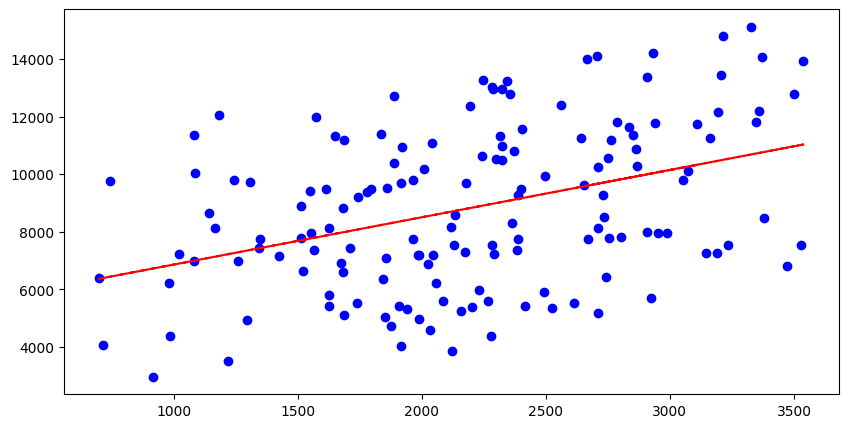

In [20]:
# Desenho do gráfico
plt.figure(figsize=(10,5))
plt.scatter(df['area_total'], df['preco_venda'] / 1000, c='blue', label='Dados')
plt.plot(df['area_total'], previsoes / 1000, color='red', linestyle='--', label='Regressão Linear (simples)')

/tmp/ipython-input-21-3102215772.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


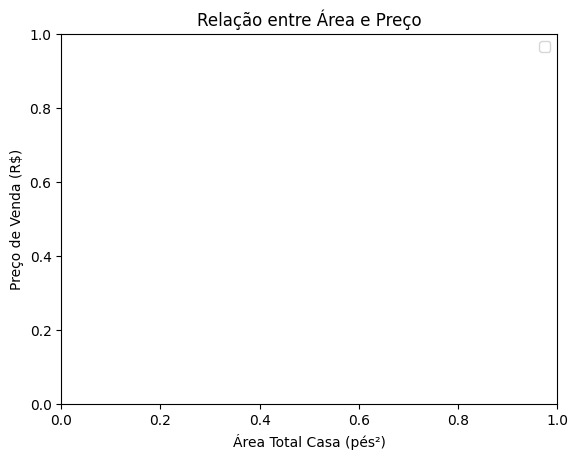

In [21]:
plt.xlabel('Área Total Casa (pés²)')
plt.ylabel('Preço de Venda (R$)')
plt.title('Relação entre Área e Preço')
plt.legend()
plt.show()